#IFT6135-A2023
#Assignment 1: Practical

You must fill in your answers to various questions in this notebook, following which you must export this notebook to a Python file named `solution.py` and submit it on Gradescope.

Only edit the functions specified in the PDF (and wherever marked – `# WRITE CODE HERE`). Do not change definitions or edit the rest of the template, else the autograder will not work.

**Make sure to request a GPU runtime with `Runtime -> Change runtime type -> <GPU of your choice>` during training**

In [ ]:
# DO NOT MODIFY!
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
if __name__ == "__main__":
  # load data
  from tensorflow.keras.datasets import mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Question 1: Multilayer Perceptron (MLP)


###1.1: Implementing single perceptron with NumPy (5 Points)

**Definition**
Perceptrons are the building blocks of MLPs. A perceptron simulates a biological neuron which can be activated or fired when responding to a stimulus. The equation of a perceptron is as follow:

$$ f(x) = \begin{cases} 1 && \text{if} & a(\mathbf{w} \cdot \mathbf{x} + b) > t \\ 0 && \text{if} & \text{otherwise} \end{cases} $$

where inputs $\mathbf{x}$ and weights $\mathbf{w}$ are multidimensional vectors, bias $b$ is a scalar, $a(.)$ is an activation function, and $t$ is a scalar threshold. This equation is binary, imitating the 'activated/fired' state and the 'resting/inactive' state of a biological neuron. In the simplest case, by choosing the identity function as $a(.)$ and $0$ as $t$, we get a linear separator. By choosing the sigmoid function $\frac{1}{1 + e^{-x}}$ as $a$ and $0.5$ as $t$, we get a logistic separator. **Note**: depending on context, perceptrons may be defined as strictly the linear separator.

**Loss function** Since $\mathbf{x}$ and $b$ are properties of the perceptron, they can be adjusted or trained to fit existing data. This very roughly corresponds to adjusting when does a neuron activate or fire given different stimuli. The first step is to quantify how close does our perceptron model fit existing data, which can be done using a loss function. Let $y$ be our binary labeled data and $\hat{y} = f(x)$ be our perceptron's predictions, we can define our loss function as:

$$ L(y, \hat{y}) = \lvert y - \hat{y} \rvert $$

This is only one of the many losses we can use, it makes intuitive sense as the distance between our label and prediction. Better losses exist, we will see them later.

**Backpropagation** Once we defined the loss, we can start adjusting our model by changing its internal weights $\mathbf{w}$ and bias $b$. The algorithm to do so is called backpropagation, which takes the gradient of the loss function w.r.t. both $\mathbf{w}$ and $b$. The gradient indicates the direction of the steepest ascent of the loss function at the current parameter, and can be seen as an indicator of where to go to most effectively maximize or minimize the loss function. By pairing it with a learning rate $lr$, the backpropagation is defined as follow:

$$ \begin{aligned}
\mathbf{w}_{t+1} &= \mathbf{w}_t - lr \cdot \frac{\partial L}{\partial \mathbf{w}} \\
\frac{\partial L}{\partial \mathbf{w}} &= \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \mathbf{w}} \\
&= -\text{sgn}(y - \hat{y}) \cdot \text{max}(0, \mathbf{x}) \\
b_{t+1} &= b_t - lr \cdot \frac{\partial L}{\partial b} \\
\frac{\partial L}{\partial b} &= \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial b} \\
&= -\text{sgn}(y - \hat{y}) \cdot 1
\end{aligned}$$

In the section below, implement a perceptron with the ReLu activation function and the absolute value loss function as shown above. The general code blocks are provided, fill in what is missing.

In [ ]:
class BinaryPerceptron:
  def __init__(self, input_dim):
    '''
    Initialize perceptron with random parameters
    '''
    self.w = np.random.randn(input_dim)
    self.b = 0

  def relu(self, x):
    '''
    Implement the ReLu function

    :param x: input vector

    :return: x after ReLu function
    '''
    # WRITE CODE HERE
    # return ...
    return np.maximum(0, x)

  def fire(self, x):
    '''
    Implement function determining whether perceptron is activated/fired given stimulus x. (Corresponds to f(x) above)

    :param x: input vector

    :return: 1 if perceptron is fired, 0 otherwise
    '''
    # WRITE CODE HERE
    # o = ...
    o = np.dot(self.w, x)
    a = self.relu(o)
    return 1 if a > 0 else 0

  def train(self, x, y, lr):
    '''
    Implement code for backpropagation used to train the model

    :param x: inputs vector x
    :param y: target label y
    :param lr: learning rate
    '''
    y_hat = self.fire(x)
    diff = y - y_hat

    # WRITE CODE HERE
    # gradient_w = ...
    gradient_w = -np.sign(diff) * np.maximum(0, x)
    # gradienb_b = ...
    gradient_b = -np.sign(diff)
    # self.w = ...
    self.w = self.w - lr * gradient_w
    # self.b = ...
    self.b = self.b - lr * gradient_b

    loss = np.abs(diff)
    return loss

Train the above model to fit the data below, using a learning rate of $0.001$. Graph your results using the provided graph function.

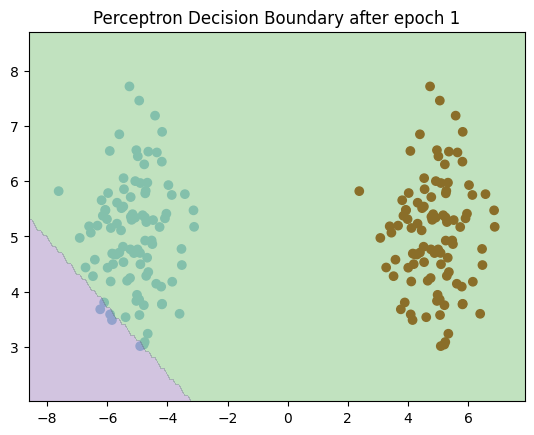

    accuracy after epoch 1:  0.255


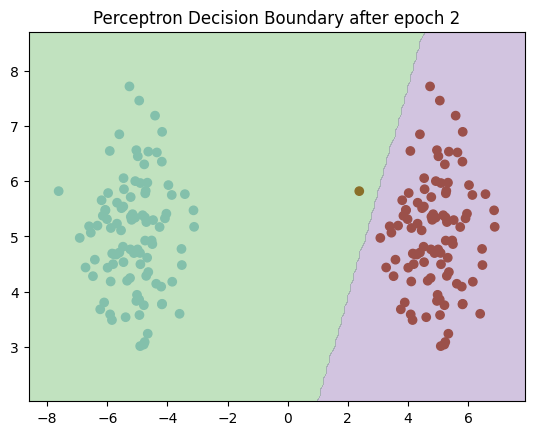

    accuracy after epoch 2:  0.88


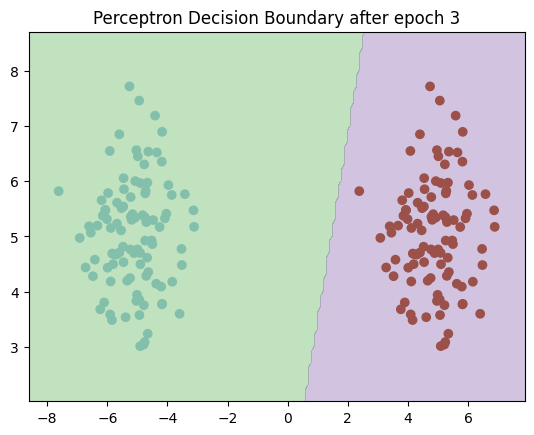

    accuracy after epoch 3:  0.995


In [ ]:
if __name__ == "__main__":
  # Generate binary synthetic data and define graph function, DO NOT MODIFY!
  # 100 data of Class 0 centered at (-5, -5)
  # 100 data of Class 1 centered at (5, 5)
  num_samples = 100
  np.random.seed(42)
  X_class0 = np.random.randn(num_samples, 2) + np.array([-5, 5])
  np.random.seed(42)
  X_class1 = np.random.randn(num_samples, 2) + np.array([5, 5])
  X = np.vstack([X_class0, X_class1])
  y = np.hstack([np.zeros(num_samples), np.ones(num_samples)])
  np.random.seed(42)
  shuffle_idx = np.random.permutation(len(X))
  X = X[shuffle_idx]
  y = y[shuffle_idx]

  def graph(X, y, perceptron, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label="Data points")
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))
    Z = np.array([perceptron.fire(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired, levels=[-1, 0, 1])
    plt.title(title)
    plt.show()

  # Train the perceptron
  num_epochs = 3
  perceptron = BinaryPerceptron(input_dim=2)
  for i in range(num_epochs):
    losses = []
    for j in range(num_samples * 2):
      # WRITE CODE HERE
      # loss =
      loss = perceptron.train(X[j], y[j], lr=0.001)
      losses.append(loss)

    graph(X, y, perceptron, f'Perceptron Decision Boundary after epoch {i + 1}')
    print(f"    accuracy after epoch {i + 1}: ", sum(1 for loss in losses if loss == 0) / (num_samples * 2))

###Question 1.2: Implementing MLPs with NumPy (25 Points)

Single perceptrons are linear classifiers and are very limited to what they can mimic in terms of data distribution. Multilayer perceptrons (MLPs) are layered perceptron networks that act as a whole to produce an output. They are proven to be universal function approximators, meaning they can approximate any continuous function given enough parameters. A layer in a MLP is defined as follow:

$$ \begin{aligned}
\mathbf{o_{l+1}} &= \mathbf{W_l} \cdot \mathbf{a_l} + \mathbf{b_l} \\
\mathbf{a_{l+1}} &= \mathbf{a(o_{l+1})}
\end{aligned} $$

where $\mathbf{o_{l+1}}$ is the preactivation output of the next layer, $\mathbf{a_{l+1}}$ is the postactivation output of the next layer, $\mathbf{W_l}$ is the weights of the current layer, $\mathbf{a_l}$ is the input to the current layer/output of last layer, $\mathbf{b_l}$ is the biases of the current layer, and $a(.)$ is the activation function.

For the first/input layer, $\mathbf{a_l}$ is the input. For the last/output layer, we use the softmax activation function paired with cross-entropy loss. In this exercise, you will implement a MLP from scratch using NumPy and train it with the MNIST dataset.

In [ ]:
class MLP(object):

  def __init__(self,
               layer_dims = (784, 128, 64, 10),
               activation = "relu",
               epsilon = 1e-6,
               lr = 0.01
               ):
    super().__init__()

    assert activation in ["relu", "sigmoid", "tanh"], "activation function needs to be among relu, sigmoid, tanh."
    self.layer_dims = layer_dims
    self.activation = activation
    self.epsilon = epsilon
    self.lr = lr
    self.init_parameters()

  def init_parameters(self):
    self.parameters = []
    for i, layer_dim in enumerate(self.layer_dims[:-1]):
      # WRITE CODE HERE
      # w =
      w = np.random.uniform(-1/np.sqrt(self.layer_dims[0]), 1/np.sqrt(self.layer_dims[0]), (layer_dim, self.layer_dims[i + 1]))
      # b =
      b = np.zeros((1, self.layer_dims[i + 1]))
      self.parameters.append({f'w' : w, f'b' : b})

  def activation_fn(self, x):
    if self.activation == "relu":
      return np.maximum(0, x)
    elif self.activation == "sigmoid":
      return 1 / (1 + np.exp(-x))
    elif self.activation == "tanh":
      return np.tanh(x)

  def gradient_activation_fn(self, x):
    if self.activation == "relu":
      # WRITE CODE HERE
      grad_x = x.copy()
      grad_x[grad_x <= 0] = 0
      grad_x[grad_x > 0] = 1
      return grad_x
    elif self.activation == "sigmoid":
      # WRITE CODE HERE
      sigma = 1 / (1 + np.exp(-x))
      return sigma * (1 - sigma)
    elif self.activation == "tanh":
      # WRITE CODE HERE
      return 1 - np.tanh(x) ** 2

  def softmax(self, x):
    # WRITE CODE HERE
    max_vals = np.max(x, axis=-1, keepdims=True)
    exp_vals = np.exp(x - max_vals)
    sum_exp_vals = np.sum(exp_vals, axis=-1, keepdims=True)
    return exp_vals / sum_exp_vals

  def layer_forward(self, x, layer_number):
    '''
    Implement code for forward/inference for the current layer
    '''
    w = self.parameters[layer_number]['w']
    b = self.parameters[layer_number]['b']
    # WRITE CODE HERE
    # pass
    o = x @ w + b
    if layer_number == len(self.parameters) - 1:
      a = self.softmax(o)
    else:
      a = self.activation_fn(o)
    self.forward_cache.append({'o' : o, 'a' : a})
    return a

  def forward(self, x):
    self.forward_cache = [{'a' : x}]
    y_hat = x
    for i in range(len(self.parameters)):
      # WRITE CODE HERE
      # y_hat = ...
      y_hat = self.layer_forward(y_hat, i)
    return y_hat

  def cross_entropy_loss(self, y_hat, y):
    y_hat[np.where(y_hat < self.epsilon)] = self.epsilon
    y_hat[np.where(y_hat > 1 - self.epsilon)] = 1 - self.epsilon

    # WRITE CODE HERE
    # loss = ...
    loss = -np.sum(np.log(y_hat) * y) / y_hat.shape[0]
    return loss

  def layer_backward(self, gradient, layer_number):
    '''
    Implement code for backpropagation for the current layer

    :gradient: if output layer: gradient of current layer's preactivation output (gradient_o) w.r.t. loss
               if other layers: gradient of current layer's postactivation output (gradient_a) w.r.t. loss
    '''
    a = self.forward_cache[layer_number]['a']
    a_prev = self.forward_cache[layer_number - 1]['a']
    w = self.parameters[layer_number - 1]['w']

    # WRITE CODE HERE
    if layer_number == len(self.layer_dims):
      gradient_o = gradient
    else:
      # gradient_o = ...
      gradient_o = gradient * self.gradient_activation_fn(a)
    # gradient_w = ...
    gradient_w = a_prev.T @ gradient_o / gradient_o.shape[0]
    # gradient_b = ...
    gradient_b = np.mean(gradient_o, axis=0, keepdims=True)
    # gradient_a_prev = ...
    gradient_a_prev = gradient_o @ w.T

    return gradient_a_prev, gradient_w, gradient_b

  def backward(self, y_hat, y):
    gradient = y_hat - y
    for i in range(len(self.parameters), 0, -1):
      gradient, gradient_w, gradient_b = self.layer_backward(gradient, i)
      # WRITE CODE HERE
      # self.parameters[i - 1]['w'] -= ...
      # self.parameters[i - 1]['b'] -= ...
      self.parameters[i - 1]['w'] -= self.lr * gradient_w
      self.parameters[i - 1]['b'] -= self.lr * gradient_b

  @staticmethod
  def one_hot_encode(labels, num_classes):
    # WRITE CODE HERE
    # pass
    batch_size = len(labels)
    one_hot = np.zeros((batch_size, num_classes))
    one_hot[np.arange(batch_size), labels] = 1
    return one_hot

  def train(self, x, y, batch_size=64, num_iterations=None):
    def graph_loss_and_accuracy(losses, accuracies):
      iterations = np.arange(len(losses)) + 1

      fig, ax1 = plt.subplots()
      color_ax1 = 'cyan'
      color_ax2 = 'pink'
      linewidth = 0.2
      ax1.set_xlabel('iterations')
      ax1.set_ylabel('cross entropy loss', color=color_ax1)
      ax1.plot(iterations, losses, color=color_ax1, linewidth=linewidth)
      ax1.tick_params(axis='y', labelcolor=color_ax1)

      ax2 = ax1.twinx()
      ax2.set_ylabel('accuracy on training set', color=color_ax2)
      ax2.plot(iterations, accuracies, color=color_ax2, linewidth=linewidth)
      ax2.tick_params(axis='y', labelcolor=color_ax2)
      plt.show()

    self.losses = []
    self.accuracies = []
    num_batches = x.shape[0] // batch_size
    # train 1 epoch by default
    if num_iterations is None: num_iterations = num_batches

    for i in range(num_iterations):
      start_idx = i * batch_size
      end_idx = start_idx + batch_size
      x_batch = x[start_idx : end_idx]
      y_batch = y[start_idx : end_idx]

      y_hat_batch = self.forward(x_batch)
      loss = self.cross_entropy_loss(y_hat_batch, y_batch)
      accuracy = np.sum(y_hat_batch.argmax(axis=-1) == y_batch.argmax(axis=-1)) / batch_size
      self.losses.append(loss)
      self.accuracies.append(accuracy)
      self.backward(y_hat_batch, y_batch)

    graph_loss_and_accuracy(self.losses, self.accuracies)

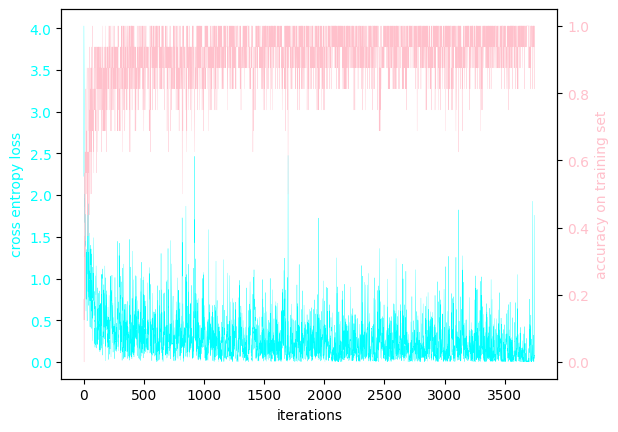

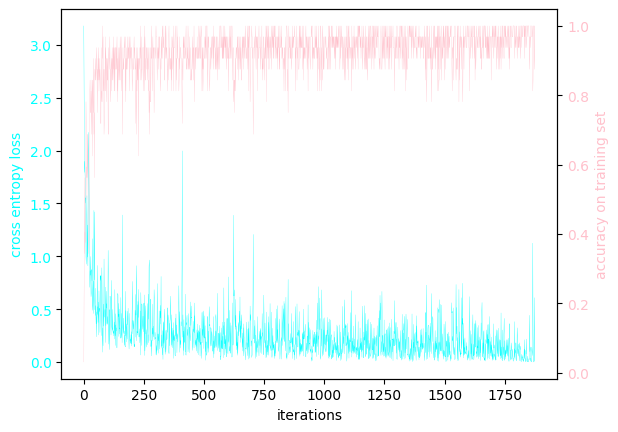

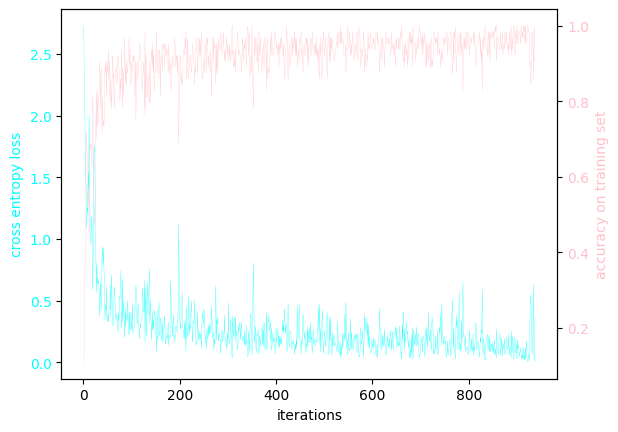

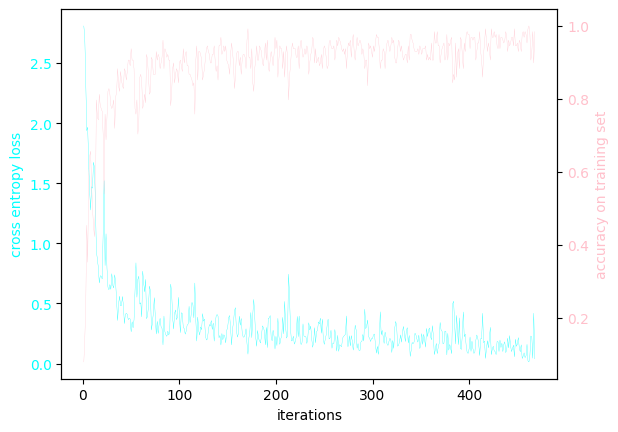

In [ ]:
if __name__ == "__main__":
  x_train_mlp = x_train.reshape(x_train.shape[0], -1)
  y_train_mlp = MLP.one_hot_encode(y_train, 10)

  # # WRITE CODE HERE
  # # train with batch sizes of 16, 32, 64, 128 respectively, use default learning rate and activation function
  batch_sizes = [16, 32, 64, 128]
  for batch_size in batch_sizes:
    mlp = MLP()
    mlp.train(x_train_mlp, y_train_mlp, batch_size)

  # observations: larger batch size might reduce oscillation and lead to faster convergence.

  # train with learning rates of 0.1, 0.01, 0.001, 0.0001 respectively, use default batch size and activation function
  learning_rates = [0.1, 0.01, 0.001, 0.0001]
  for learning_rate in learning_rates:
    mlp = MLP(lr=learning_rate)
    mlp.train(x_train_mlp, y_train_mlp)

  # observations: learning rate too large may prevent model convergence, too small might lead to slow convergence. It is important to find the optimal range.

  # train with activation functions of "relu", "sigmoid" and "tanh" respectively, use default learning rate and batch size
  activation_functions = ["relu", "sigmoid", "tanh"]
  for activation_function in activation_functions:
    mlp = MLP(activation=activation_function)
    mlp.train(x_train_mlp, y_train_mlp)

  # observations: activation functions greatly affect model's training. sigmoid and tanh are also prone to vanishing gradient problem because they are bounded to fixed intervals.
  #               It is necessarily to experiment and determine the best activation function for your model and dataset.

## Question 2. Convolutional Neural Network (CNN)

#### Question 2.1: implementing convolution layer

In [ ]:
class Convolution2dLayer(object):
  """
  Implements a 2D convolution layer.
  """

  def __init__(self, filter_size=3, stride=1, n_outchannel=32):
    """
    Constructor of the Convolution2dLayer class.

    Note: We assume that the input images have only a single channel.

    :param filter_size: filter size to use for convolution. We assume equal height and width. (int, default 3)
    :param stride: stride for convolution. (int, default 1)
    :n_outchannel: number of output channels, i.e., number of filters in the layer. (int, default 32)
    """
    super().__init__()

    self.filter_size = filter_size
    self.stride = stride
    self.n_outchannel = n_outchannel
    self.initialize_weights()

  def initialize_weights(self):
    """
    Initializes the weights of the CNN from uniform distribution(0, 1) and the biases to zeros.
    """
    # self.weights is an np.array of shape (n_outchannel, filter_size, filter_size)
    # We do not consider biases in this convolution layer implementation
    self.weights = np.random.uniform(low=0, high=1, size=(self.n_outchannel, self.filter_size, self.filter_size))

  def _get_filtersizeXfiltersize_views(self, x):
    """
    Function to iterate through the input with given stride.

    :param x: input of shape (batch size, 1, h, w). We assume input has only 1 channel.
              for a list of inputs, h and w must be consistent across the inputs.

    :returns: a generator that produces the current 'view' of the input and its indices given the stride
              it will be a tuple of following format: ( view's row index, view's column index, view with shape (batch size, 1, stride, stride) )

    """
    rows, cols = x.shape[2], x.shape[3]

    # loop over rows and columns with a stride of filter_size x filter_size to get views
    for i in range(0, rows, self.stride):
      for j in range(0, cols, self.stride):
        if i + self.filter_size - 1 < rows and j + self.filter_size - 1 < cols:
          #WRITE CODE HERE
          # yield ...
          yield int(i / self.stride), int(j / self.stride), x[:, :, i:i + self.filter_size, j:j + self.filter_size]

  def forward(self, x):
    """
    Function to forward 2d convolution.
    Note: You need not flip the kernel! You may just implement cross-correlation.

    :param x: Inputs to convolve. This may contain multiple input examples, not just one.
              Note: We assume that the input images have only a single channel.

    :returns: Inputs and the result of the convolution operation on the inputs stored in cache.
    """
    cache = {}

    # cache is a dictionary where cache["x"] stores the inputs and cache["out"] stores the outputs of the layer
    cache["x"] = x
    output_h = int((x.shape[2] - self.filter_size) / self.stride + 1)
    output_w = int((x.shape[3] - self.filter_size) / self.stride + 1)
    cache["out"] = np.zeros((x.shape[0], self.weights.shape[0], output_h, output_w))

    for view_h, view_w, view in self._get_filtersizeXfiltersize_views(x):
      # WRITE CODE HERE
      # cache["out"][?, ?, ?, ?] = ...
      cache["out"][:,:,view_h, view_w] = view.reshape(-1, self.filter_size ** 2) @ self.weights.reshape(-1, self.filter_size ** 2).T

    return cache

  def backward(self, cache, grad_output):
    """
    Function to backward gradients of 2d convolution

    :param cache: dictionary containing the inputs and the result of the convolution operation applied on them.
    :param grad_output: gradient of the loss w.r.t. the outputs of the convolution layer.

    :returns: Gradient of the loss w.r.t. the parameters of the convolution layer.
    """
    # grads is an np.array containing the gradient of the loss with respect to the parameters in the convolution layer
    # Remember to account for the number of input examples!
    # WRITE CODE HERE
    x = cache["x"]
    grads = np.zeros(self.weights.shape)
    k = grad_output.shape[2]
    for i in range(self.n_outchannel):
      for h in range(self.filter_size):
        for w in range(self.filter_size):
          grads[i, h, w] = (grad_output[:, i].squeeze() * x.squeeze()[:, h:h+grad_output.shape[2], w:w+grad_output.shape[3]]).sum()
    return grads

Question 2.2: implementing max-pooling layer

In [ ]:
class MaxPooling2dLayer(object):
  """
  Implements a 2D max-pooling layer.

  """
  def __init__(self, filter_size=2):
    """
    Constructor of the MaxPooling2dLayer class.

    :param filter_size: size of filter for max-pooling. int, default 2
                        we assume equal height and width, and stride = height = width = filter_size
    """
    super().__init__()
    self.filter_size = filter_size

  def _get_filtersizeXfiltersize_views(self, x):
    """
    Function to iterate through the input with given stride.

    :param x: input of shape (batch size, 1, h, w). We assume input has only 1 channel.

    :returns: a generator that produce the current 'view' of the input with the given stride,
              will be a tuple of following format: ( view's row index, view's column index, view itself with shape (batch size, 1, stride, stride) )
    """
    rows, cols = x.shape[2], x.shape[3]

    # loop over rows and columns with a stride of filter_size x filter_size to get non-overlappig views
    for i in range(0, rows, self.filter_size):
      for j in range(0, cols, self.filter_size):
        if i + self.filter_size - 1 < rows and j + self.filter_size - 1 < cols:
          #WRITE CODE HERE
          # yield ...
          yield int(i / self.filter_size), int(j / self.filter_size), x[:, :, i:i + self.filter_size, j:j + self.filter_size]

  def forward(self, x):
    """
    Function to forward 2dPooling.

    :param x: Inputs to compute max-pooling for. This may contain multiple input examples, not just one.
              Note: The input dimensions to max-pooling are the output dimensions of the convolution!

    :returns: Inputs and the result of the max-pooling operation on the inputs stored in cache.
    """
    # cache is a dictionary where cache["x"] stores the inputs and cache["out"] stores the outputs of the layer
    cache = {}
    cache["x"] = x
    output_h = int(x.shape[2] / self.filter_size)
    output_w = int(x.shape[3] / self.filter_size)
    cache["out"] = np.zeros((x.shape[0], x.shape[1], output_h, output_w))

    for view_h, view_w, view in self._get_filtersizeXfiltersize_views(x):
      # WRITE CODE HERE
      # cache["out"][:, :, ?, ?] = ?
      cache["out"][:, :, view_h, view_w] = view.max(axis=(2, 3))

    return cache

  def backward(self, cache, grad_output):
    """
    Function to backward gradients of 2dPooling.

    :param cache: Contains the inputs and the result of the max-pooling operation applied on them.
    :param grad_output: Gradient of the loss w.r.t. the outputs of the max-pooling layer.

    :returns: Gradient of the loss w.r.t. the inputs to the max-pooling layer.
    """

    x = cache["x"]
    grads = np.zeros_like(x)

    for view_h, view_w, view in self._get_filtersizeXfiltersize_views(x):
      # WRITE CODE HERE
      max_vals = view.max(axis=(2, 3), keepdims=True)
      max_mask = (view == max_vals).astype(int)
      grad_output_view = grad_output[:, :, view_h, view_w][:, :, None, None]
      grads[:, :, view_h*self.filter_size:(view_h+1)*self.filter_size, view_w*self.filter_size:(view_w+1)*self.filter_size] = max_mask * grad_output_view

    return grads

### Question 3

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
device = "cuda" if torch.cuda.is_available() else "cpu"

# Fix random seed, DO NOT CHANGE
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
def get_cifar10():
  normalize = transforms.Normalize(
      mean=[0.4914, 0.4822, 0.4465],
      std=[0.2023, 0.1994, 0.2010],
  )

  # define transforms
  transform = transforms.Compose([
          transforms.Resize((227,227)),
          transforms.ToTensor(),
          normalize,
  ])

  train_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=True, download=True, transform=transform)
  train_loader = torch.utils.data.DataLoader(
      train_dataset, batch_size=64, shuffle=True, num_workers=2)

  val_dataset = torchvision.datasets.CIFAR10(
      root='./data', train=False, download=True, transform=transform)
  val_loader = torch.utils.data.DataLoader(
      val_dataset, batch_size=64, shuffle=False, num_workers=2)

  return train_loader, val_loader

In [ ]:
if __name__ == "__main__":
  train_loader, val_loader = get_cifar10()
  from tqdm import tqdm

In [ ]:
"""## Question 3: Implementation and experimentation

### Question 3.2
"""


class VGG16(nn.Module):
  """This class implements the VGG-16 architecture in PyTorch"""

  def __init__(self, activation_str="relu", initialization="xavier_normal"):
    """
      Constructor for the VGG16 class.

      activation_str: string, default "relu"
        Activation function to use.
      initialization: string, default "xavier_normal"
        Weight initialization to use.
    """
    super(VGG16, self).__init__()
    self.n_classes = 10
    self.activation_str = activation_str
    self.initialization = initialization

    self.conv_layer_1 = nn.Conv2d(3, 64, 3, padding=1)
    self.conv_layer_2 = nn.Conv2d(64, 64, 3, padding=1)
    self.conv_layer_3 = nn.Conv2d(64, 128, 3, padding=1)
    self.conv_layer_4 = nn.Conv2d(128, 128, 3, padding=1)
    self.conv_layer_5 = nn.Conv2d(128, 256, 3, padding=1)
    self.conv_layer_6 = nn.Conv2d(256, 256, 3, padding=1)
    self.conv_layer_7 = nn.Conv2d(256, 256, 3, padding=1)
    self.conv_layer_8 = nn.Conv2d(256, 512, 3, padding=1)
    self.conv_layer_9 = nn.Conv2d(512, 512, 3, padding=1)
    self.conv_layer_10 = nn.Conv2d(512, 512, 3, padding=1)
    self.conv_layer_11 = nn.Conv2d(512, 512, 3, padding=1)
    self.conv_layer_12 = nn.Conv2d(512, 512, 3, padding=1)
    self.conv_layer_13 = nn.Conv2d(512, 512, 3, padding=1)

    self.max_pool_layer_1 = nn.MaxPool2d(2, stride=2)
    self.max_pool_layer_2 = nn.MaxPool2d(2, stride=2)
    self.max_pool_layer_3 = nn.MaxPool2d(2, stride=2)
    self.max_pool_layer_4 = nn.MaxPool2d(2, stride=2)
    self.max_pool_layer_5 = nn.MaxPool2d(2, stride=2)

    self.fc_1 = nn.Linear(25088, 4096)
    self.fc_2 = nn.Linear(4096, 4096)
    self.fc_3 = nn.Linear(4096, 10)

    torch.nn.init.xavier_uniform_(self.conv_layer_1.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_2.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_3.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_4.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_5.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_6.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_7.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_8.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_9.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_10.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_11.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_12.weight)
    torch.nn.init.xavier_uniform_(self.conv_layer_13.weight)
    torch.nn.init.xavier_uniform_(self.fc_1.weight)
    torch.nn.init.xavier_uniform_(self.fc_2.weight)
    torch.nn.init.xavier_uniform_(self.fc_3.weight)


  def activation(self, input):
    """
      input: Tensor
        Input on which the activation is applied.

      Output: Result of activation function applied on input.
        E.g. if self.activation_str is "relu", return relu(input).
    """
    if self.activation_str == "relu":
      return nn.functional.relu(input)
    elif self.activation_str == "tanh":
      return nn.functional.tanh(input)
    else:
      raise Exception("Invalid activation")
    return 0


  def get_first_conv_layer_filters(self):
    """
      Outputs: Returns the filters in the first convolution layer.
    """
    return self.conv_layer_1.weight.clone().cpu().detach().numpy()

  def get_last_conv_layer_filters(self):
    """
      Outputs: Returns the filters in the last convolution layer.
    """
    return self.conv_layer_13.weight.clone().cpu().detach().numpy()

  def forward(self, x):
    """
      x: Tensor
        Input to the network.

      Outputs: Returns the output of the forward pass of the network.
    """
    x = self.activation(self.conv_layer_1(x))
    x = self.activation(self.conv_layer_2(x))
    x = self.max_pool_layer_1(x)
    x = self.activation(self.conv_layer_3(x))
    x = self.activation(self.conv_layer_4(x))
    x = self.max_pool_layer_2(x)
    x = self.activation(self.conv_layer_5(x))
    x = self.activation(self.conv_layer_6(x))
    x = self.activation(self.conv_layer_7(x))
    x = self.max_pool_layer_3(x)
    x = self.activation(self.conv_layer_8(x))
    x = self.activation(self.conv_layer_9(x))
    x = self.activation(self.conv_layer_10(x))
    x = self.max_pool_layer_4(x)
    x = self.activation(self.conv_layer_11(x))
    x = self.activation(self.conv_layer_12(x))
    x = self.activation(self.conv_layer_13(x))
    x = self.max_pool_layer_5(x)
    x = torch.flatten(x, start_dim=1)
    x = self.activation(self.fc_1(x))
    x = self.activation(self.fc_2(x))
    x = nn.functional.softmax(self.fc_3(x), dim=1)
    return x

"""### Question 3.3"""


def train_loop(epoch, model, train_loader, criterion, optimizer):
  """
    epoch: int
      Number of the current training epoch (starting from 0).
    model: VGG16
      The model to train, which is an instance of the VGG16 class.
    train_loader: DataLoader
      The training dataloader.
    criterion: Module
      A Module object that evaluates the crossentropy loss.
    optimizer: Optimizer
      An Optimizer object for the Adam optimizer.

    Outputs: Returns average train_acc and train_loss for the current epoch.
  """
  train_acc = 0.
  train_loss = 0.
  total_correct = 0
  total_samples = 0
  i = 0
  for data in tqdm(train_loader):
        i += 1
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)
        # Compute the loss and its gradients
        loss = criterion(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        if i % 100 == 0:
            train_acc = 100 * total_correct / total_samples

            print(f"Epoch: {epoch} i:{i} | Train Acc: {train_acc:.6f} | Train Loss: {train_loss:.6f}")
            total_correct = 0
            total_samples = 0
            train_loss = 0
            train_acc = 0

  print(f"Epoch: {epoch} | Train Acc: {train_acc:.6f} | Train Loss: {train_loss:.6f}")
  return train_acc, train_loss

def valid_loop(epoch, model, val_loader, criterion):
  """
    epoch: int
      Number of the current epoch (starting from 0).
    model: VGG16
      The model to train, which is an instance of the VGG16 class.
    val_loader: DataLoader
      The validation dataloader.
    criterion: Module
      A Module object that evaluates the crossentropy loss.

    Outputs: Returns average val_acc and val_loss for the current epoch.
  """
  val_acc = 0
  val_loss = 0
  total_correct = 0
  total_samples = 0
  for data in tqdm(val_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = criterion(outputs, labels)

        # Gather data and report
        val_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

  val_acc = 100 * total_correct / total_samples

  print(f"Epoch: {epoch} | Val Acc: {val_acc:.6f}   | Val Loss: {val_loss:.6f}")
  return val_acc, val_loss


In [ ]:
if __name__ == "__main__":

  activation_str = "relu"
  initialization = "xavier_normal"

  train_accs, train_losses, val_accs, val_losses = [], [], [], []
  n_epochs = 25

  model = VGG16(
    activation_str=activation_str,
    initialization=initialization
  ).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters())

  for epoch in range(n_epochs):
    # # Training
    train_acc, train_loss = train_loop(epoch, model, train_loader, criterion, optimizer)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Validation
    val_acc, val_loss = valid_loop(epoch, model, val_loader, criterion)
    val_accs.append(val_acc)
    val_losses.append(val_loss)